# PRUEBA 
### Nombres: Malki Yupanki

Introducción:
Es fundamental verificar la calidad de los números  pseudoaleatorios. Ademas es importante no olvidar las 2 propiedades más importantes que deben tener los números pseudoaleatorios: uniformidad e independencia.

La uniformidad se puede verificar usando las pruebas de bondad de ajuste test Chi Cuadrada

Chi-Cuadrada

Esta prueba verifica la desviación del valor esperado y  se usa cuando se trabaja con variables nominales (categorías o grupos)
Debemos responder a la pregunta: ¿Difieren las frecuencias observadas de la frecuencia esperada?

Pasos para aplicar la prueba:

1. Tomar la serie de N números pseudo-aleatorios.

2. Dividir la serie en n intervalos (grados libertad)

3. Calcular la esperanza
E_i=N/n
4. Calcular la cantidad de números observados por intervalo O_i
5. Calcular Chi – Cuadrado:
    -χ_0^2=(∑_(i=1)^k 〖(O_i-E_i)〗^2)/E_i 
6. Si χ_0^2⩽χ_(k-1)^2 se acepta H0  (los números están distribuidos uniformemente)

### DESARROLLO

Para el desarrollo de la prueba procedemos a crear los diferentes metodos que nos permitiran ralizae los calculos que se solicitan para la evaluacion. 

Luego de definir los meotodos procemos a realizar los calculos con los datos que se entrwegaron:

 Cuadrados medios: Xo=74731897457, D=7
 
 Congruencia lineal: a=74731897457, b=37747318974, Xo=7, M=19


In [88]:
import numpy as np
import math as mtp
import matplotlib.pyplot as plt

In [89]:
def cortes(num_digitos):
    digstos1 =0
    digitos2=0
    if num_digitos%2 !=0:
        digstos1 = int(num_digitos / 2)
        digitos2 = int(num_digitos / 2) + 1
    else:
        digstos1 = int(num_digitos / 2)
        digitos2 = int(num_digitos / 2)
    return digstos1,digitos2

def calculo_num(num_iteras, valor_inicio, num_digitos):
    lista =[]
    semilla_xi = int(valor_inicio)
    aux = cortes(num_digitos)
    for i in range(num_iteras):
        xn2= semilla_xi ** 2
        lon = len(str(xn2))
        ui = str(xn2)[int(lon/2)-aux[0]:int(lon/2)+aux[1]]
        rn = int(ui) / 10 ** num_digitos
        lista.append(rn)
        semilla_xi=int(ui)
    return lista
def lista_Numeros(grupos, aux_incremento, lista):
    grupos = []
    rango_aux = 0.00
    for i in range(grupos + 1):
        grupos.append(round(rango_aux, 2))
        rango_aux = rango_aux + aux_incremento
    aux_inicio = 0
    aux_nuevo = 1
    rangos = {}
    for i in range(len(grupos) - 1):
        minimo = grupos[aux_inicio]
        maximo = grupos[aux_nuevo]
        rangos.update({str(minimo) + "," + str(maximo): []})
        for i in lista:
            if i == 0.00:
                if i >= minimo and i <= maximo:
                    rangos[str(minimo) + "," + str(maximo)].append(i)
            else:
                if i > minimo and i <= maximo:
                    rangos[str(minimo) + "," + str(maximo)].append(i)
        aux_inicio = aux_nuevo
        aux_nuevo = aux_inicio + 1
    return rangos

def metodo_CHI(lista, valor):
    n = int(mtp.sqrt(len(lista)))
    dic = lista_to_dict(n,1/n, lista)
    suma = 0.00
    print("X_I", "     Ei    ", "      Oi ", " (Oi-Ei)**2/Ei")
    for x, it in enumerate(dic.items()):
        f = ((len(it[1])-n)**2)/n
        suma+=f
        print(x, "  ", str(n)+"("+it[0]+")     ", len(it[1]),"     ", f)
    plt.hist(lista)
    plt.ylabel('Repeticiones')
    plt.xlabel('Intervaloes')
    plt.title('Chi-Cuadrado')
    plt.show()
    print("Suma: ",suma)
    if suma< valor:
        return True
    else:
        return False

def metodo_PRODMED(x, a, c, mod, iters):
    num = 0.00
    lista = []
    for i in range(iters):
        x = (a * x + c) % mod
        num = round(x / mod, 2)
        lista.append(num)
    return lista


X_I      Ei           Oi   (Oi-Ei)**2/Ei
0    10(0.0,0.1)      10       0.0
1    10(0.1,0.2)      17       4.9
2    10(0.2,0.3)      14       1.6
3    10(0.3,0.4)      7       0.9
4    10(0.4,0.5)      11       0.1
5    10(0.5,0.6)      11       0.1
6    10(0.6,0.7)      6       1.6
7    10(0.7,0.8)      6       1.6
8    10(0.8,0.9)      8       0.4
9    10(0.9,1.0)      10       0.0


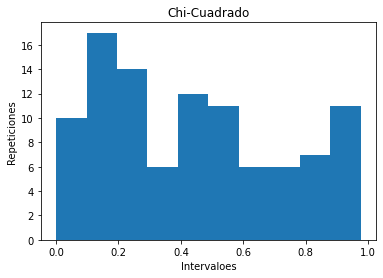

Suma:  11.2


In [90]:
valor = 16.9
valores_iniciales =[74731897457]
iteraciones = 100
digitos_iniciales = 7
lista = calculo_num(iteraciones, i, digitos_iniciales)
res=metodo_CHI(lista,valor)


X_I      Ei           Oi   (Oi-Ei)**2/Ei
0    10(0.0,0.1)      11       0.1
1    10(0.1,0.2)      11       0.1
2    10(0.2,0.3)      0       10.0
3    10(0.3,0.4)      22       14.4
4    10(0.4,0.5)      0       10.0
5    10(0.5,0.6)      0       10.0
6    10(0.6,0.7)      11       0.1
7    10(0.7,0.8)      11       0.1
8    10(0.8,0.9)      23       16.9
9    10(0.9,1.0)      11       0.1


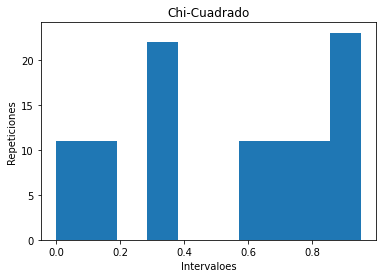

Suma:  61.800000000000004


In [91]:
x = 7 
a = 74731897457 
b = 37747318974
M = 19
lista2 = metodo_PRODMED(x,a,b,M,iteraciones)
res2 = metodo_CHI(lista2,valor)
